In [1]:
import pandas as pd
# import pandasql as ps
import matplotlib.pyplot as plt
# Import argsort
from numpy import argsort
from Functions.connection.connection import *
from Functions.AlertP1.data_cleaning import *
from Functions.AlertP1.features import *
from Functions.analysis.step_analysis import *
from Functions.AlertP1.dummy_features import *
from Functions.Models.Logistic_regression import *
from Functions.Models.evaluation import *

## Connection to databse

In [2]:
alertP1=connection("/Users/MarouanKamoun/Desktop/HGO pbl/credentials.csv")

Tables: [('ConsultaUrgencia_doentespedidosconsultaNeurologia2012',), ('consultaneurologia2012',), ('consultaneurologia201216anon_true',)]
38


## Data cleaning

In [3]:
#changing columns with date to a datetime
date_format_alertP1(alertP1)
#change the blank values in proveniencia and priority to unknown
replace_blank(alertP1)
#create a column with the output of a referral and select the refused and accepted ones
alertP1=result(alertP1)

c:\Users\MarouanKamoun\Desktop\HGO pbl\PBL-HGO\PBL-HGO\Functions\AlertP1\data_cleaning.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  alertP1['PROVENIENCIA'][alertP1['PROVENIENCIA']=='']='unknown'
c:\Users\MarouanKamoun\Desktop\HGO pbl\PBL-HGO\PBL-HGO\Functions\AlertP1\data_cleaning.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  alertP1['CTH_PRIOR'][alertP1['CTH_PRIOR']=='']='unknown'


## Creating new columns for features 

In [4]:
class_area(alertP1)
text_length(alertP1)
referral_steps(alertP1)
alertP1=unit(alertP1)
alertP1=alertP1.sort_values('trata data recusa')
alertP1

c:\Users\MarouanKamoun\Desktop\HGO pbl\PBL-HGO\PBL-HGO\Functions\AlertP1\features.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  alertP1['step'][alertP1['step']>=3]='3+'
c:\Users\MarouanKamoun\Desktop\HGO pbl\PBL-HGO\PBL-HGO\Functions\AlertP1\features.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  alertP1['unit'][alertP1['TIPO_UNID']!='CS/USF']='HOSP'


,ID_DOENTE,PROCESSO,COD_REFERENCIA,COD_PZ,COD_UNID_SAUDE_PROV,UNID_PROV,TIPO_UNID,PROVENIENCIA,COD_CTH_PRIOR,CTH_PRIOR,...,trata data recusa,resume saída,mês_saida,ano_saida,Texto,result,area,text_length,step,unit
6944,ZDGGGA,BMJNMVVJ,LOHHHHRS,,0,,OUTRA,unknown,,unknown,...,2012-01-02,01/08/2012,8,2012,,1,outside area,0,1,HOSP
3203,CZAEGS,BMNJDBJ,LOHHHOLT,,0,,OUTRA,unknown,,unknown,...,2012-01-03,23/01/2012,1,2012,,1,outside area,0,1,HOSP
8620,EZDFGG,BEVIMVIL,LOHHHOQO,,0,,OUTRA,unknown,,unknown,...,2012-01-04,04/01/2012,1,2012,,0,outside area,0,1,HOSP
9316,ASBZH,BDVCNMLN,LOHHHRVP,,0,,OUTRA,unknown,,unknown,...,2012-01-05,05/01/2012,1,2012,,0,outside area,0,1,HOSP
3717,BZGBFZ,VVMBENJE,LOHHHTTH,,0,,OUTRA,unknown,,unknown,...,2012-01-05,05/01/2012,1,2012,,0,outside area,0,1,HOSP
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
468,ECFBBZ,VLMIDMI,LSHUSUUQ,,0,,OUTRA,SAM,3,Normal,...,2018-02-08,01/03/2018,3,2018,,1,outside area,0,1,HOSP
6398,FFCAE,BIJIILBC,LSHTULLS,,0,,OUTRA,SAM,3,Normal,...,2018-02-09,09/03/2018,3,2018,,1,outside area,0,1,HOSP
6664,ZZCDCG,BMJMICVB,LSHTORSQ,,0,,OUTRA,SAM,3,Normal,...,2018-03-08,04/05/2018,5,2018,,1,outside area,0,2,HOSP
154,SFFEEE,LLMMCM,LSHSQQPU,,0,,OUTRA,SAM,3,Normal,...,2018-03-08,15/06/2018,6,2018,Tonturas. EN normal. TC CE mostrando diversas ...,1,outside area,95,1,HOSP


## structured data with dummies

In [5]:
data=structured_data_dummies(alertP1)
print(data.columns)
data

Index([                          'ID_DOENTE',
                                  'PROCESSO',
                            'COD_REFERENCIA',
                                    'COD_PZ',
                       'COD_UNID_SAUDE_PROV',
                                 'UNID_PROV',
                                 'TIPO_UNID',
                             'COD_CTH_PRIOR',
                                 'CTH_PRIOR',
                         'COD_MOTIVO_RECUSA',
                         'DES_MOTIVO_RECUSA',
                         'COD_ESPECIALIDADE',
                                'agrupadora',
                            'OUTRA_ENTIDADE',
                             'DATA_RECEPCAO',
                                'DATA_ENVIO',
                              'DATA_RETORNO',
                                  'NUM_TAXA',
                                    'ESTADO',
                             'DATA_MARCACAO',
                           'DATA_REALIZACAO',
                               'OB

,ID_DOENTE,PROCESSO,COD_REFERENCIA,COD_PZ,COD_UNID_SAUDE_PROV,UNID_PROV,TIPO_UNID,COD_CTH_PRIOR,CTH_PRIOR,COD_MOTIVO_RECUSA,...,DVC,EPILEPSIA,NEUROLOGIA - CEFALEIAS,NEUROLOGIA - ESCLEROSE MULTIPLA,NEUROLOGIA DO COMPORTAMENTO,2,3+,HOSP,UCSP,USF
6944,ZDGGGA,BMJNMVVJ,LOHHHHRS,,0,,OUTRA,,unknown,0,...,0,0,0,0,0,0,0,1,0,0
3203,CZAEGS,BMNJDBJ,LOHHHOLT,,0,,OUTRA,,unknown,0,...,0,0,0,0,0,0,0,1,0,0
8620,EZDFGG,BEVIMVIL,LOHHHOQO,,0,,OUTRA,,unknown,1,...,0,0,0,0,0,0,0,1,0,0
9316,ASBZH,BDVCNMLN,LOHHHRVP,,0,,OUTRA,,unknown,1,...,0,0,0,0,0,0,0,1,0,0
3717,BZGBFZ,VVMBENJE,LOHHHTTH,,0,,OUTRA,,unknown,7,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
468,ECFBBZ,VLMIDMI,LSHUSUUQ,,0,,OUTRA,3,Normal,0,...,0,0,0,0,0,0,0,1,0,0
6398,FFCAE,BIJIILBC,LSHTULLS,,0,,OUTRA,3,Normal,0,...,0,0,0,0,0,0,0,1,0,0
6664,ZZCDCG,BMJMICVB,LSHTORSQ,,0,,OUTRA,3,Normal,0,...,0,0,0,0,0,1,0,1,0,0
154,SFFEEE,LLMMCM,LSHSQQPU,,0,,OUTRA,3,Normal,0,...,1,0,0,0,0,0,0,1,0,0


## Logistic regression for all dataset

features and coefficients

In [17]:
#split dataset in features and target variable// Question: is it the right option?
eliminate_cols=['text_length','ID_DOENTE','PROCESSO','COD_REFERENCIA','result','COD_PZ','COD_UNID_SAUDE_PROV','UNID_PROV','TIPO_UNID','COD_CTH_PRIOR','CTH_PRIOR','COD_MOTIVO_RECUSA','DES_MOTIVO_RECUSA','COD_ESPECIALIDADE','agrupadora','OUTRA_ENTIDADE','DATA_RECEPCAO','DATA_ENVIO','DATA_RETORNO','NUM_TAXA','ESTADO','DATA_MARCACAO','DATA_REALIZACAO','OBSERVACOES','Mês_entrada','Ano_entrada','trata data recusa','resume saída','mês_saida','ano_saida','Texto']
X = data.drop(eliminate_cols,axis=1)# Features
y = data.result # Target variable
features=X.columns
#log_regression is defined in functions
y_pred,coefficients,intercept,X_train, X_test, y_train, y_test=log_regression(X,y)
df = pd.DataFrame(features, columns =['Feature'])
df['coefficients']=coefficients.T
df


,Feature,coefficients
0,outside area,-0.151662
1,SAM,0.595436
2,SON,-1.204556
3,unknown,-1.036065
4,APOIO DOENCAS NEUROLOGICAS CRONICAS,2.328588
5,DOENCAS DO MOVIMENTO,3.408085
6,DVC,2.140626
7,EPILEPSIA,3.187620
8,NEUROLOGIA - CEFALEIAS,0.000000
9,NEUROLOGIA - ESCLEROSE MULTIPLA,2.257854


metrics

Accuracy: 0.5847732181425486
Recall: 0.5445739236550758
Precision: 0.7442408781694496
              precision    recall  f1-score   support

     refused       0.92      0.10      0.17       843
    accepted       0.57      0.99      0.72      1009

    accuracy                           0.58      1852
   macro avg       0.74      0.54      0.45      1852
weighted avg       0.73      0.58      0.47      1852



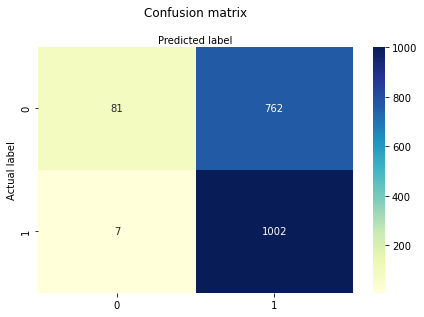

In [20]:
# Evaluate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Evaluate the recall of the model
recall = recall_score(y_test, y_pred, average='macro')
print("Recall:", recall)

# Evaluate the precision of the model
precision = precision_score(y_test, y_pred, average='macro')
print("Precision:", precision)

# Calculate the confusion matrix of the model
cnf_matrix = confusion_matrix(y_test, y_pred)


class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
# Print the evaluation matrix
target_names = ['refused', 'accepted']
print(classification_report(y_test, y_pred, target_names=target_names))

p value

In [21]:
p_value(X,y)

,Feature,p_value
0,outside area,0.000000e+00
1,SAM,4.163195e-15
2,SON,0.000000e+00
3,unknown,0.000000e+00
4,APOIO DOENCAS NEUROLOGICAS CRONICAS,9.427691e-03
5,DOENCAS DO MOVIMENTO,3.335486e-29
6,DVC,1.153450e-06
7,EPILEPSIA,3.383452e-38
8,NEUROLOGIA - CEFALEIAS,3.268588e-01
9,NEUROLOGIA - ESCLEROSE MULTIPLA,1.843868e-06


## Logistic regression text variables

In [6]:
#logistic regression text rows
data_no_text=data[data['text_length']>0]
#split dataset in features and target variable// Question: is it the right option?
eliminate_cols=['ID_DOENTE','PROCESSO','COD_REFERENCIA','result','COD_PZ','COD_UNID_SAUDE_PROV','UNID_PROV','TIPO_UNID','COD_CTH_PRIOR','CTH_PRIOR','COD_MOTIVO_RECUSA','DES_MOTIVO_RECUSA','COD_ESPECIALIDADE','agrupadora','OUTRA_ENTIDADE','DATA_RECEPCAO','DATA_ENVIO','DATA_RETORNO','NUM_TAXA','ESTADO','DATA_MARCACAO','DATA_REALIZACAO','OBSERVACOES','Mês_entrada','Ano_entrada','trata data recusa','resume saída','mês_saida','ano_saida','Texto']
X = data_no_text.drop(eliminate_cols,axis=1)# Features
y = data_no_text.result # Target variable
features=X.columns
#log_regression is defined in functions
y_pred,coefficients,intercept,X_train, X_test, y_train, y_test=log_regression(X,y)
df = pd.DataFrame(features, columns =['Feature'])
df['coefficients']=coefficients.T
df

c:\Users\MarouanKamoun\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


,Feature,coefficients
0,text_length,0.001587
1,outside area,0.840309
2,SAM,0.299464
3,SON,0.005203
4,unknown,-1.219038
5,APOIO DOENCAS NEUROLOGICAS CRONICAS,0.070989
6,DOENCAS DO MOVIMENTO,2.381785
7,DVC,0.327281
8,EPILEPSIA,2.814004
9,NEUROLOGIA - CEFALEIAS,0.000000


metrics

Accuracy: 0.53125
Recall: 0.5
Precision: 0.265625
              precision    recall  f1-score   support

     refused       0.00      0.00      0.00       150
    accepted       0.53      1.00      0.69       170

    accuracy                           0.53       320
   macro avg       0.27      0.50      0.35       320
weighted avg       0.28      0.53      0.37       320



c:\Users\MarouanKamoun\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\MarouanKamoun\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\MarouanKamoun\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\MarouanKamoun\anaconda3\lib\site-pa

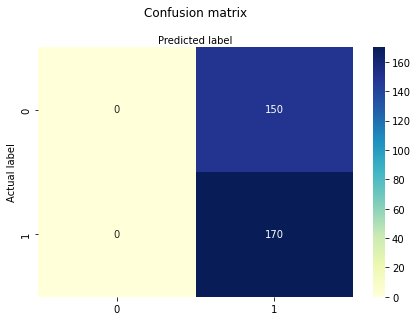

In [7]:
# Evaluate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Evaluate the recall of the model
recall = recall_score(y_test, y_pred, average='macro')
print("Recall:", recall)

# Evaluate the precision of the model
precision = precision_score(y_test, y_pred, average='macro')
print("Precision:", precision)

# Calculate the confusion matrix of the model
cnf_matrix = confusion_matrix(y_test, y_pred)


class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
# Print the evaluation matrix
target_names = ['refused', 'accepted']
print(classification_report(y_test, y_pred, target_names=target_names))

In [30]:
p_value(X,y)

,Feature,p_value
0,text_length,2.568252e-30
1,outside area,4.194272e-27
2,SAM,1.991165e-04
3,SON,1.331836e-03
4,unknown,2.500977e-32
5,APOIO DOENCAS NEUROLOGICAS CRONICAS,5.001601e-01
6,DOENCAS DO MOVIMENTO,1.173987e-06
7,DVC,4.246248e-02
8,EPILEPSIA,8.765856e-09
9,NEUROLOGIA - CEFALEIAS,5.001601e-01


## Logistic without high p-value

In [9]:
#logistic regression text rows
data_no_text=data[data['text_length']>0]
#split dataset in features and target variable// Question: is it the right option?
eliminate_cols=['ID_DOENTE','PROCESSO','COD_REFERENCIA','result','COD_PZ','COD_UNID_SAUDE_PROV','UNID_PROV','TIPO_UNID','COD_CTH_PRIOR','CTH_PRIOR','COD_MOTIVO_RECUSA','DES_MOTIVO_RECUSA','COD_ESPECIALIDADE','agrupadora','OUTRA_ENTIDADE','DATA_RECEPCAO','DATA_ENVIO','DATA_RETORNO','NUM_TAXA','ESTADO','DATA_MARCACAO','DATA_REALIZACAO','OBSERVACOES','Mês_entrada','Ano_entrada','trata data recusa','resume saída','mês_saida','ano_saida','Texto','UCSP','NEUROLOGIA - ESCLEROSE MULTIPLA','NEUROLOGIA - CEFALEIAS','3+']
X = data_no_text.drop(eliminate_cols,axis=1)# Features
y = data_no_text.result # Target variable
features=X.columns
#log_regression is defined in functions
y_pred,coefficients,intercept,X_train, X_test, y_train, y_test=log_regression(X,y)
df = pd.DataFrame(features, columns =['Feature'])
df['coefficients']=coefficients.T
df

,Feature,coefficients
0,text_length,0.001585
1,outside area,0.870474
2,SAM,0.324199
3,SON,0.001417
4,unknown,-1.202175
5,APOIO DOENCAS NEUROLOGICAS CRONICAS,0.072142
6,DOENCAS DO MOVIMENTO,2.379040
7,DVC,0.333373
8,EPILEPSIA,2.808800
9,NEUROLOGIA DO COMPORTAMENTO,2.113770


Accuracy: 0.53125
Recall: 0.5
Precision: 0.265625
              precision    recall  f1-score   support

     refused       0.00      0.00      0.00       150
    accepted       0.53      1.00      0.69       170

    accuracy                           0.53       320
   macro avg       0.27      0.50      0.35       320
weighted avg       0.28      0.53      0.37       320



c:\Users\MarouanKamoun\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\MarouanKamoun\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\MarouanKamoun\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\MarouanKamoun\anaconda3\lib\site-pa

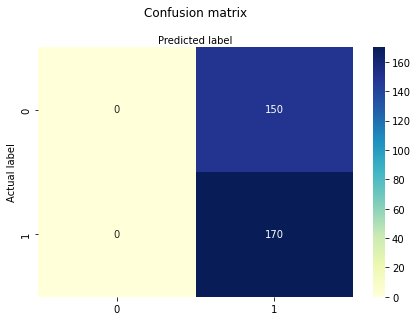

In [10]:
# Evaluate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Evaluate the recall of the model
recall = recall_score(y_test, y_pred, average='macro')
print("Recall:", recall)
# Evaluate the precision of the model
precision = precision_score(y_test, y_pred, average='macro')
print("Precision:", precision)

# Calculate the confusion matrix of the model
cnf_matrix = confusion_matrix(y_test, y_pred)


class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
# Print the evaluation matrix
target_names = ['refused', 'accepted']
print(classification_report(y_test, y_pred, target_names=target_names))


In [11]:
p_value(X,y)


,Feature,p_value
0,text_length,2.568252e-30
1,outside area,4.194272e-27
2,SAM,1.991165e-04
3,SON,1.331836e-03
4,unknown,2.500977e-32
5,APOIO DOENCAS NEUROLOGICAS CRONICAS,5.001601e-01
6,DOENCAS DO MOVIMENTO,1.173987e-06
7,DVC,4.246248e-02
8,EPILEPSIA,8.765856e-09
9,NEUROLOGIA DO COMPORTAMENTO,1.832156e-06
